In [1]:
using PyPlot

g = 9.7864
m1 = 1
m2 = 0.05
l1 = 0.5
l2 = 0.2

0.2

In [2]:
der_ang(p1, p2, c1, c2) = p1 * c1 + p2 * c2
der_p(ang, c1, c2) = c1 * sin(ang) + c2
fixang(ang) = atan2(sin(ang),cos(ang))

fixang (generic function with 1 method)

In [24]:
dt = 0.0001;
t_max = 500;
count = Int64(t_max/dt);
x=0

#constantes de uso comum
c1 = 1 / (m1 * l1^2);
c2 = 1 / (m2 * l2^2);
c3 = -1 * m1 * g * l1;
c4 = -1 * m2 * g * l2;
cp = 1 / (m1 * l1 * l2);

out_p1 = [];
out_ang1 =[];

for j = 1 : 8
#condicoes iniciais envolvendo energia
E_0 = 2 + (j-1) * 4;
ang1 = 0;
    ang1l = 0
ang2 = pi/2;
    ang2l = 0
p1 = sqrt(2 * m1 * l1^2 *(E_0 - m2 * l2 * g));
    p1l = 0
p2 = 0;  
    p2l = 0
print(E_0);
    print("\n")
for i = 1 : count-1
cv1 = -cos(ang1 - ang2) * cp;
cv2 = -sin(ang1 - ang2) * cp * p1 * p2;
k_ang1_1 = der_ang(p1, p2, c1, cv1) * dt;
k_ang2_1 = der_ang(p2, p1, c2, cv1) * dt;
k_p1_1 = der_p(ang1, c3, cv2) * dt;
k_p2_1 = der_p(ang2, c4, -cv2) * dt;
xang1 = ang1 + k_ang1_1;
xang2 = ang2 + k_ang2_1;
xp1 = p1 + k_p1_1;
xp2 = p2 + k_p2_1;
k_ang1_2 = der_ang(xp1, xp2, c1, cv1) * dt;
k_ang2_2 = der_ang(xp2, xp1, c2, cv1) * dt;
k_p1_2 = der_p(xang1, c3, cv2) * dt;
k_p2_2 = der_p(xang2, c4, -cv2) * dt;
        ang1l = ang1
        ang2l = ang2
ang1 = fixang(ang1 + k_ang1_2);
ang2 = fixang(ang2 + k_ang2_2);
        p1 = p1 + k_p1_2;
p2 = p2 + k_p2_2;
        if( sign(ang2) != sign(ang2l))
if( p2 > 0)
x = x + 1;
                push!(out_ang1, ang1)
                push!(out_p1, p1)
end
end

end
end


2
4
6
8
10
12
14
16
18


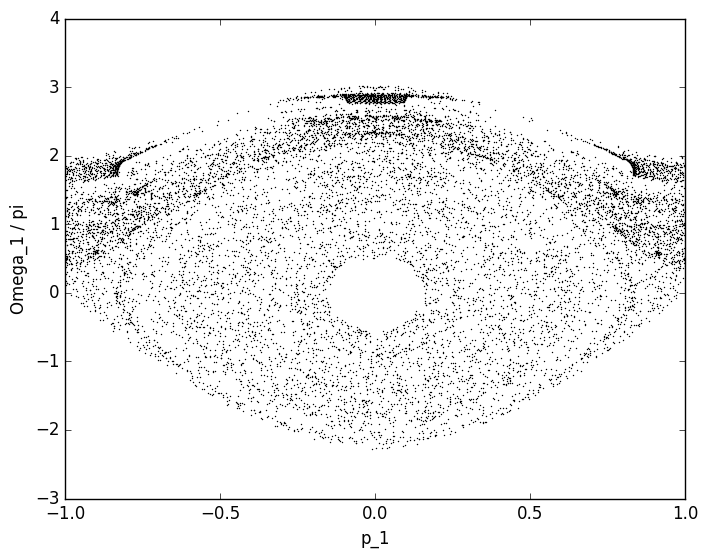

PyObject <matplotlib.text.Text object at 0x7f80dde8fa50>

In [26]:
plot(out_ang1/pi, out_p1, ".k", markersize=1)
xlabel("p_1")
ylabel("Omega_1 / pi")